In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import os, json

As we are using image data, this is going to be pretty quick.

In [2]:
train = keras.utils.image_dataset_from_directory(
    directory='data/train/',
    labels='inferred',
    label_mode='categorical',
    batch_size=None,
    image_size=(224, 224),
    shuffle=False)
test = keras.utils.image_dataset_from_directory(
    directory='data/test/',
    labels='inferred',
    label_mode='categorical',
    batch_size=None,
    image_size=(224, 224),
    shuffle=False)
valid = keras.utils.image_dataset_from_directory(
    directory='data/valid/',
    labels='inferred',
    label_mode='categorical',
    batch_size=None,
    image_size=(224, 224),
    shuffle=False)

Found 58388 files belonging to 400 classes.
Found 2000 files belonging to 400 classes.
Found 2000 files belonging to 400 classes.


In [3]:
test.element_spec

(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(400,), dtype=tf.float32, name=None))

In [4]:
list(test.as_numpy_iterator())[0]

(array([[[ 36.,   6.,   4.],
         [ 28.,   0.,   0.],
         [ 27.,   3.,   0.],
         ...,
         [ 58.,  72.,  57.],
         [ 74.,  88.,  75.],
         [ 87., 101.,  88.]],
 
        [[ 33.,   3.,   1.],
         [ 30.,   2.,   0.],
         [ 28.,   4.,   0.],
         ...,
         [ 45.,  59.,  46.],
         [ 60.,  74.,  61.],
         [ 77.,  91.,  78.]],
 
        [[ 42.,  11.,   8.],
         [ 39.,  10.,   6.],
         [ 34.,   9.,   4.],
         ...,
         [ 39.,  52.,  42.],
         [ 54.,  70.,  59.],
         [ 71.,  87.,  76.]],
 
        ...,
 
        [[  0.,   2.,   0.],
         [  0.,   2.,   0.],
         [  0.,   1.,   0.],
         ...,
         [ 35.,  63.,   2.],
         [ 35.,  63.,   2.],
         [ 34.,  62.,   1.]],
 
        [[  0.,   2.,   0.],
         [  0.,   2.,   0.],
         [  0.,   1.,   0.],
         ...,
         [ 36.,  61.,   3.],
         [ 32.,  60.,   1.],
         [ 30.,  58.,   0.]],
 
        [[  0.,   2.,   0.],
 

In [10]:
#in order to keep track of labels, we will create a label dictionary
#also a helper function to use it
labelDict = {}
labels = os.listdir('data/test')
for i in range(len(labels)):
    labelDict[i] = labels[i]
labelDict[0]
def getSpecies(labelArray):
    return labelDict[list(labelArray).index(1)]

In [7]:
#the training data is far to large to hold in memory in list form
#most analysis is impossible to do on the entire set
trainShuffled = train.shuffle(1000)
trainIterator = trainShuffled.as_numpy_iterator()
sample = []
for i in range(1000):
    sample.append(trainIterator.next())
#sample is now a list of 1000 random elements from the training data

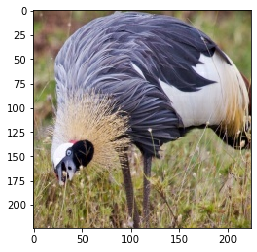

In [8]:
#Each entry includes 2 arrays
#the first is the image data, which is stored as a 3D array
#the first 2 dimensions are the X and Y values of each pixel
#the final dimension is the RGB channels for each pixel
from matplotlib import pyplot as plt
plt.imshow(sample[0][0].astype(int), interpolation='nearest')
plt.show()

In [11]:
#the second is a 1D array, which represents the label
getSpecies(sample[0][1])

'AFRICAN CROWNED CRANE'